# Sentiment Analysis in Python: TextBlob vs Vader Sentiment vs Flair vs Building It From Scratch
- https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair

Sentiment analysis is one of the most widely known Natural Language Processing (NLP) tasks. 
This article aims to give the reader a very clear understanding of sentiment analysis and different methods through which it is implemented in NLP. So let’s dive in.

The field of NLP has evolved very much in the last five years, open-source packages like Spacy, TextBlob, etc. provide ready to use functionalities for NLP like sentiment analysis. There are so many of these packages available for free to make you confused about which one to use for your application. 

In this article, I will discuss the most popular NLP Sentiment analysis packages:

- Textblob
- VADER
- Flair
- Custom model

## What is sentiment analysis?

Sentiment analysis is the task of determining the emotional value of a given expression in natural language. 

It is essentially a multiclass text classification text where the given input text is classified into positive, neutral, or negative sentiment. The number of classes can vary according to the nature of the training dataset. 

For example, sometimes it is formulated as a binary classification problem with 1 as positive sentiment and 0 as negative sentiment label.

## Application of sentiment analysis

Sentiment analysis has applications in a wide variety of domains including analyzing user reviews, tweet sentiment, etc. Let’s go through some of them here:

- Movie reviews: Analysing online movie reviews to get insights from the audience about the movie.
- News sentiment analysis: analyzing news sentiments for a particular organization to get insights.
- Social media sentiment analysis: analyze the sentiments of Facebook posts, twitter tweets, etc.
- Online food reviews: analyzing sentiments of food reviews from user feedback.

## Sentiment analysis in python 

There are many packages available in python which use different methods to do sentiment analysis. In the next section, we shall go through some of the most popular methods and packages.

### Rule-based sentiment analysis

Rule-based sentiment analysis is one of the very basic approaches to calculate text sentiments. It only requires minimal pre-work and the idea is quite simple, this method does not use any machine learning to figure out the text sentiment. For example, we can figure out the sentiments of a sentence by counting the number of times the user has used the word “sad” in his/her tweet. 

Now, let’s check out some python packages that work using this method.

#### Textblob 
It is a simple python library that offers API access to different NLP tasks such as sentiment analysis, spelling correction, etc.

Textblob sentiment analyzer returns two properties for a given input sentence: 

Polarity is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments. 
Subjectivity is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment. 
Let’s see how to use Textblob:

In [1]:
from textblob import TextBlob

testimonial = TextBlob("The food was great!")
print(testimonial.sentiment)

Sentiment(polarity=1.0, subjectivity=0.75)


Textblob will ignore the words that it doesn’t know, it will consider words and phrases that it can assign polarity to and averages to get the final score.

#### VADER sentiment

Valence aware dictionary for sentiment reasoning (VADER) is another popular rule-based sentiment analyzer. 

It uses a list of lexical features (e.g. word) which are labeled as positive or negative according to their semantic orientation to calculate the text sentiment.   

Vader sentiment returns the probability of a given input sentence to be 

Positive, negative, and neutral. 

For example:

“The food was great!”
Positive : 99%
Negative :1%
Neutral : 0%

These three probabilities will add up to 100%.

Let’s see how to use VADER:

In [3]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 5.3MB/s 


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()
sentence = "The food was great!" 
vs = analyzer.polarity_scores(sentence)
print("{:-<65} {}".format(sentence, str(vs)))

The food was great!---------------------------------------------- {'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


Vader is optimized for social media data and can yield good results when used with data from twitter, facebook, etc.

The main drawback with the rule-based approach for sentiment analysis is that the method only cares about individual words and completely ignores the context in which it is used. 

For example, “the party was savage” will be negative when considered by any token-based algorithms.

In [5]:
sentence = "the party was savage" 
vs = analyzer.polarity_scores(sentence)
print("{:-<65} {}".format(sentence, str(vs)))

the party was savage--------------------------------------------- {'neg': 0.39, 'neu': 0.26, 'pos': 0.351, 'compound': -0.0772}


### Embedding based models
Text embeddings are a form of word representation in NLP in which synonymically similar words are represented using similar vectors which when represented in an n-dimensional space will be close to each other.

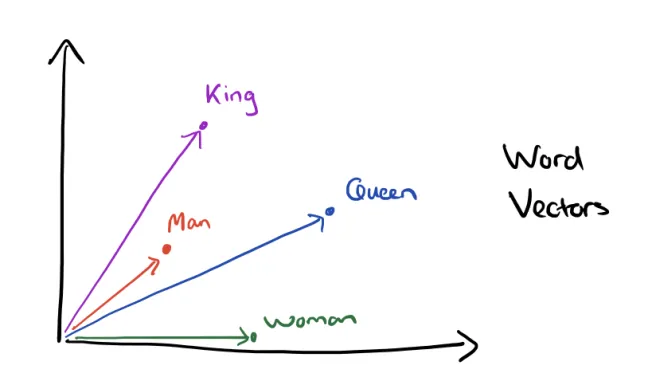

Embedding based python packages use this form of text representation to predict text sentiments. This leads to better text representation in NLP and yields better model performance.

One of such packages is Flair.   

#### Flair 
Flair is a simple to use framework for state of the art NLP. 

It provided various functionalities such as:

pre-trained sentiment analysis models, 
text embeddings, 
NER, 
and more.
Let’s see how to very easily and efficiently do sentiment analysis using flair.

Flair pretrained sentiment analysis model is trained on IMDB dataset. To load and make prediction using it simply do:

In [7]:
!pip install flair

     |████████████████████████████████| 450kB 5.7MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 1.3MB 16.3MB/s 
     |████████████████████████████████| 1.1MB 25.7MB/s 
     |████████████████████████████████| 798kB 34.2MB/s 
     |████████████████████████████████| 19.7MB 1.3MB/s 
     |████████████████████████████████| 983kB 62.1MB/s 
     |████████████████████████████████| 890kB 48.1MB/s 
     |████████████████████████████████| 2.9MB 45.1MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45613 sha256=56b9098ef2b51d05771b6cd2930562336d81109b5e4efa1d9778da95b328d4a9
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116678 sha256=7b7a9cbcf3d6307f5366a0dd5bd472d9948c826264f7d6cbbcb381bc79955ffa
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cef

In [8]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')
sentence = Sentence('The food was great!')
classifier.predict(sentence)

# print sentence with predicted labels
print('Sentence above is: ', sentence.labels)

2020-12-31 05:14:12,921 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_3.1.pt not found in cache, downloading to /tmp/tmp1t42spr9


100%|██████████| 266147697/266147697 [00:10<00:00, 24501372.24B/s]

2020-12-31 05:14:24,154 copying /tmp/tmp1t42spr9 to cache at /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


2020-12-31 05:14:24,985 removing temp file /tmp/tmp1t42spr9
2020-12-31 05:14:25,381 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt



Sentence above is:  [POSITIVE (0.9961)]


If you like to have a custom sentiment analyzer for your domain, it is possible to train a classifier using flair using your dataset.

The drawback of using a flair pre-trained model for sentiment analysis is that it is trained on IMDB data and this model might not generalize well on data from other domains like twitter.

### Building sentiment analysis model from scratch 

- Why a Custom Model?

- Output에 대해서 more Flexible한 모델 제어가 필요한 경우

- TFhub
  - TensorFlow Hub is a repository of trained machine learning models ready for fine-tuning and deployable anywhere. 
  - we will use the universal sentence encoder which encodes text to high dimensional vectors.
   You can also use any of your preferred text representation models available like GloVe, fasttext, word2vec, etc

- Setup kaggle API

In [9]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


- Import Packages

In [10]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.utils import shuffle
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os
import pandas as pd
DATASET_ENCODING = "ISO-8859-1"

- Download and process Twitter Sentiment dataset

In [11]:
!kaggle datasets download -d kazanova/sentiment140

 69% 56.0M/80.9M [00:00<00:00, 141MB/s]
100% 80.9M/80.9M [00:00<00:00, 150MB/s]


In [12]:
df = pd.read_csv("/content/sentiment140.zip",encoding=DATASET_ENCODING)
df= df.iloc[:,[0,-1]]
df.columns = ['sentiment','tweet']
df = pd.concat([df.query("sentiment==0").sample(20000),df.query("sentiment==4").sample(20000)])
df.sentiment = df.sentiment.map({0:0,4:1})
df =  shuffle(df).reset_index(drop=True)

df,df_test = train_test_split(df,test_size=0.2)

In [13]:
df.head(5)

,sentiment,tweet
3015,1,@AdrianneCurry @Pink sensational! Looking fow...
3603,1,home again... plans changed...canada in january
11716,0,Friday night was amazing...Drunkenness with my...
2259,0,For those who are not working ? http://blip.f...
10543,0,"@CoffeeBoss Awe...I've been crying all day, se..."


- Load Universal Sentence Encoder from TFhub

In [14]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

INFO:absl:resolver HttpCompressedFileResolver does not support the provided handle.
INFO:absl:resolver GcsCompressedFileResolver does not support the provided handle.


In [15]:
embed(['hi samuels, this is our project']).numpy().shape

(1, 512)

In [16]:
def vectorize(df):
    embeded_tweets = embed(df['tweet'].values.tolist()).numpy()
    targets = df.sentiment.values
    return embeded_tweets,targets

embeded_tweets,targets = vectorize(df)

- Model

In [17]:
model = Sequential()
model.add(Input(shape=(512,),dtype='float32'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 73,985
Trainable params: 73,985
Non-trainable params: 0
_________________________________________________________________


- Train and evaluate

In [23]:
num_epochs = 100
batch_size = 32   ## 2^x

history = model.fit(embeded_tweets, 
                    targets, 
                    epochs=num_epochs, 
                    validation_split=0.1, 
                    shuffle=True,
                    batch_size=batch_size)

Epoch 1/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0774 - acc: 0.9739 - val_loss: 1.8425 - val_acc: 0.7359
Epoch 2/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0538 - acc: 0.9802 - val_loss: 2.1406 - val_acc: 0.7309
Epoch 3/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0270 - acc: 0.9901 - val_loss: 2.3682 - val_acc: 0.7412
Epoch 4/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0210 - acc: 0.9930 - val_loss: 2.6237 - val_acc: 0.7431
Epoch 5/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0250 - acc: 0.9907 - val_loss: 2.6857 - val_acc: 0.7400
Epoch 6/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0257 - acc: 0.9909 - val_loss: 2.5473 - val_acc: 0.7356
Epoch 7/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0257 - acc: 0.9907 - val_loss: 2.4718 - val_acc: 0.7422
Epoch 8/100
900/900 [==============================] - 2s 2ms/step - 

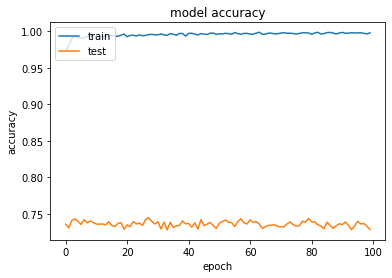

In [24]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

- Compare results

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
embed_test,targets = vectorize(df_test)
predictions = model.predict(embed_test).astype(int)
accuracy_score(predictions,targets)*100

69.0

In [28]:
from textblob import TextBlob

def text_sentiment(text):
    testimonial = TextBlob(text)
    return int(testimonial.sentiment.polarity>0.5)

predictions = df_test.tweet.map(lambda x :  text_sentiment(x))
accuracy_score(predictions,targets)*100

55.93749999999999

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def text_sentiment_vader(text):
  vs = analyzer.polarity_scores(text)
  return int(vs.get("compound")>0)
 
predictions = df_test.tweet.map(lambda x : text_sentiment_vader(x))
accuracy_score(predictions.values,targets)*100

65.375

In [32]:
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')

def text_sentiment_flair(text):
  sentence = Sentence(text)
  classifier.predict(sentence)
  return np.round(sentence.labels[0].score)

predictions = df_test.tweet.map(lambda x : text_sentiment_flair(x))

2020-12-31 05:57:32,211 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [33]:
accuracy_score(predictions.values,targets)*100

49.875